In [ ]:
import kagglehub

path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3


In [ ]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)

for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        break

df = pd.read_csv(filepath)
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
#Check for missing values and handle them appropriately
missing_values = df.isnull().sum()
print(missing_values)



meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [ ]:
#Describe the dataset's key statistics (mean, median, standard deviation).
statistics = df.describe()
print(statistics)


          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


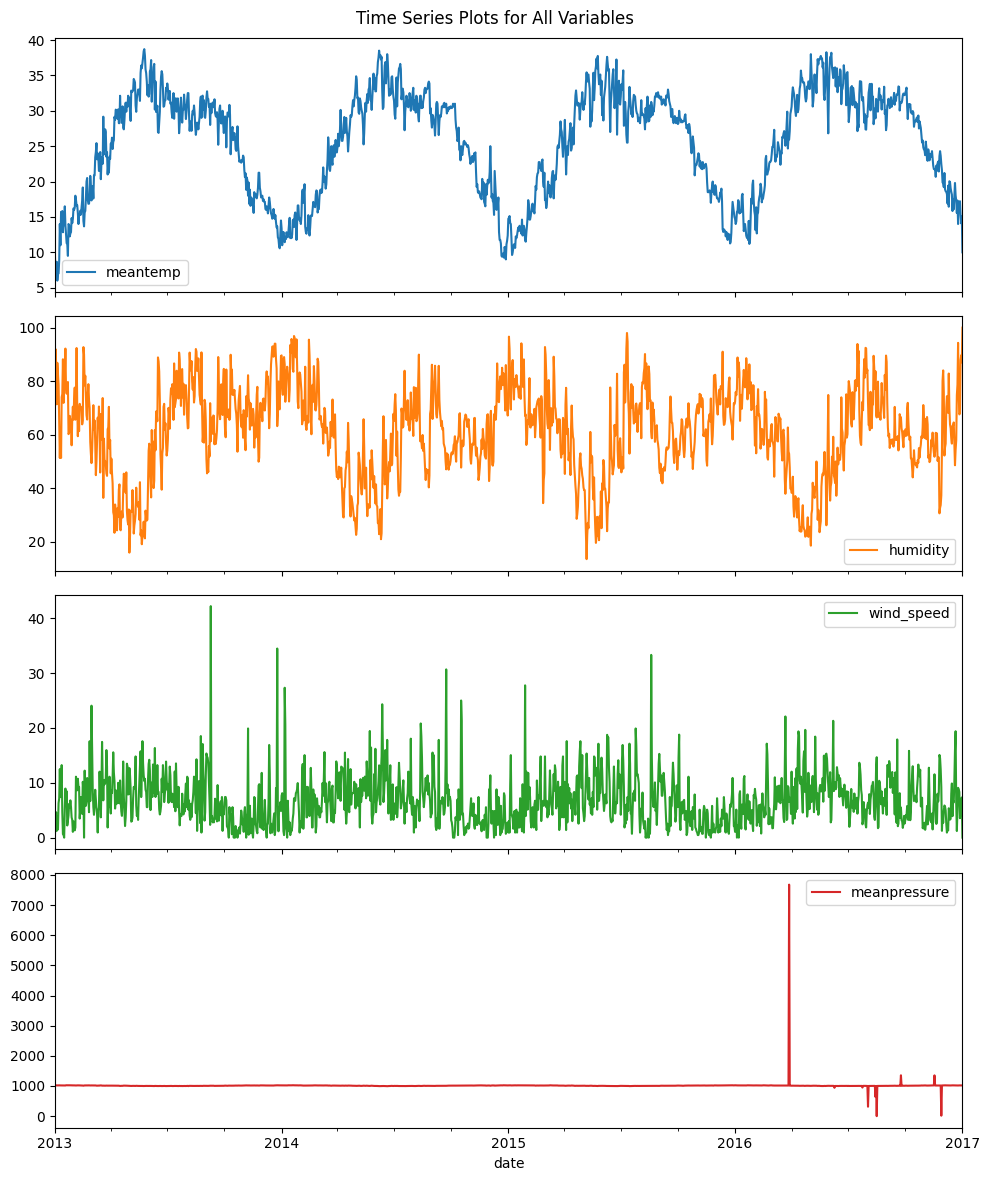

In [ ]:
import matplotlib.pyplot as plt
if 'df' in locals() and not df.empty:

    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)

    # Plot each numeric column
    numeric_columns = df.select_dtypes(include=['number']).columns  # Select only numeric columns
    df[numeric_columns].plot(subplots=True, figsize=(10, len(numeric_columns) * 3), title="Time Series Plots for All Variables")

    plt.tight_layout()
    plt.show()
else:
    print("The DataFrame is empty or not loaded correctly.")

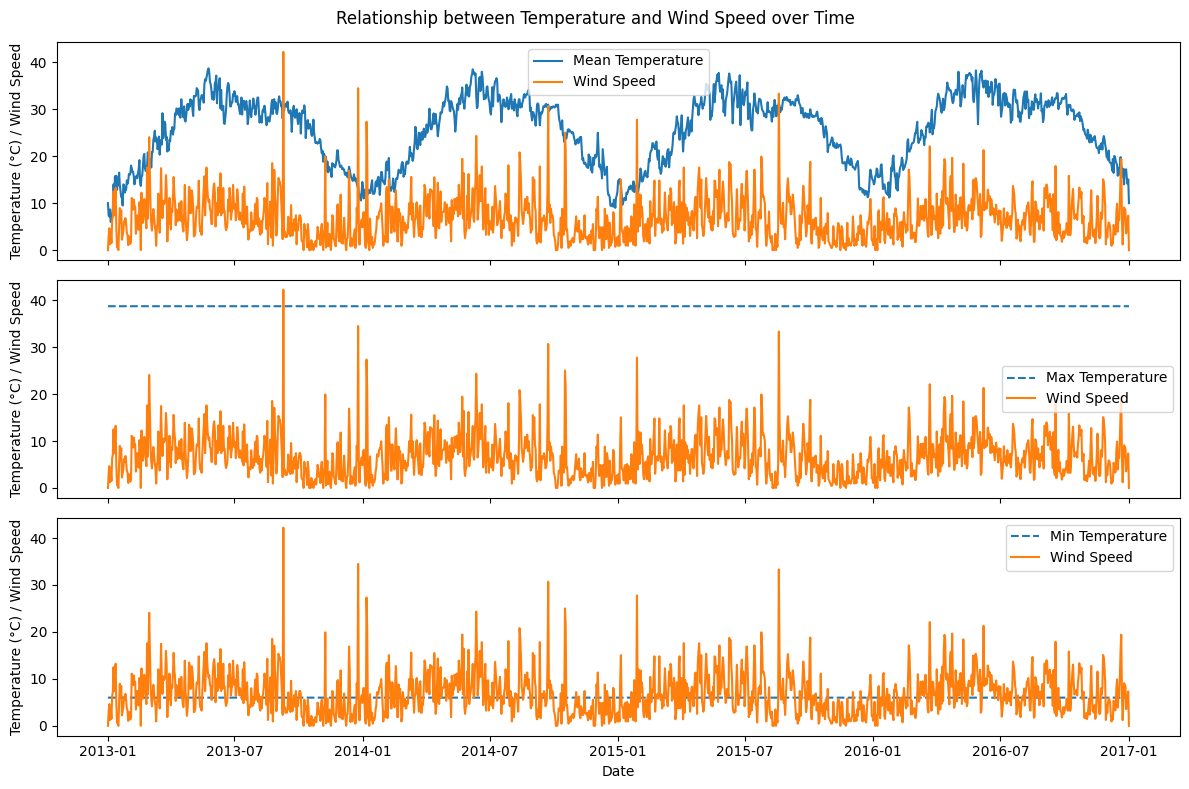

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_train = df

temp_stats = df_train['meantemp'].describe()
min_temp = temp_stats['min']
max_temp = temp_stats['max']
mean_temp = temp_stats['mean']

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].plot(df_train.index, df_train['meantemp'], label='Mean Temperature')
axes[0].plot(df_train.index, df_train['wind_speed'], label='Wind Speed')
axes[0].set_ylabel('Temperature (°C) / Wind Speed')
axes[0].legend()

axes[1].plot(df_train.index, [max_temp] * len(df_train), label='Max Temperature', linestyle='--')
axes[1].plot(df_train.index, df_train['wind_speed'], label='Wind Speed')
axes[1].set_ylabel('Temperature (°C) / Wind Speed')
axes[1].legend()

axes[2].plot(df_train.index, [min_temp] * len(df_train), label='Min Temperature', linestyle='--')
axes[2].plot(df_train.index, df_train['wind_speed'], label='Wind Speed')
axes[2].set_ylabel('Temperature (°C) / Wind Speed')
axes[2].legend()

fig.suptitle('Relationship between Temperature and Wind Speed over Time')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

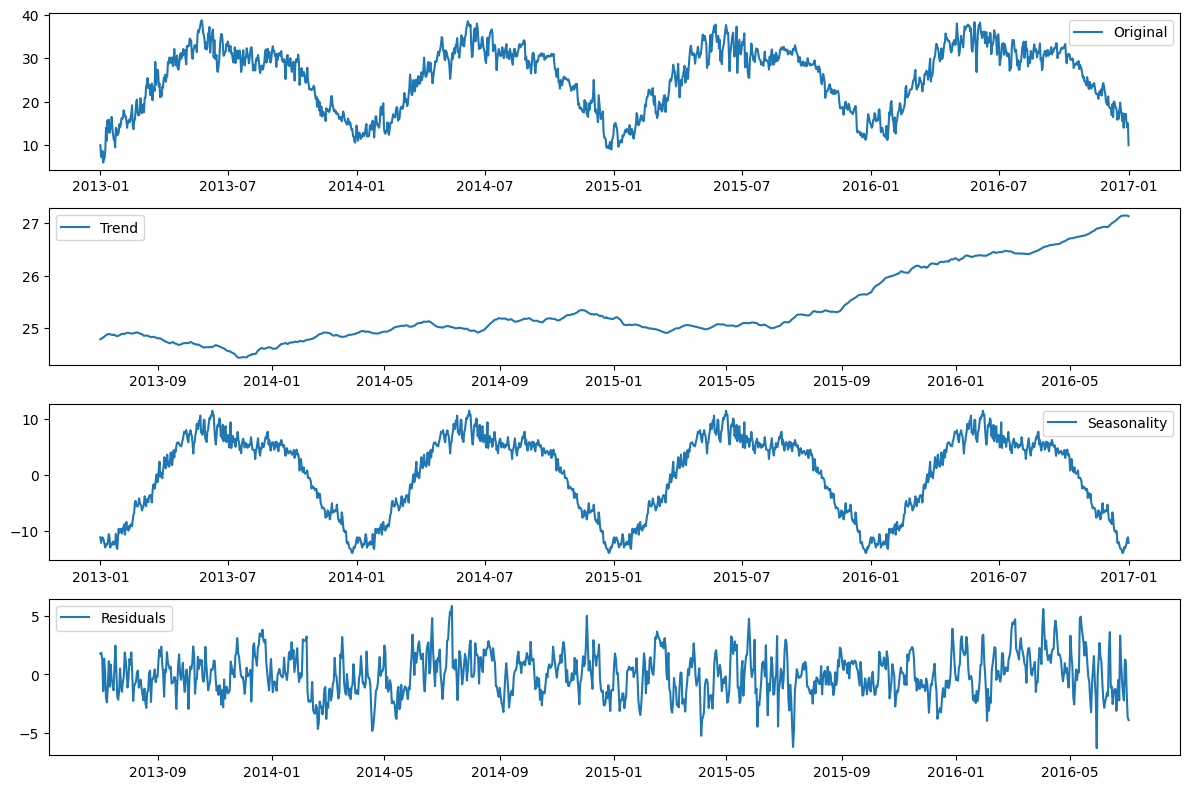

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
decomposition = sm.tsa.seasonal_decompose(df_train['meantemp'], model='additive', period=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_train['meantemp'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

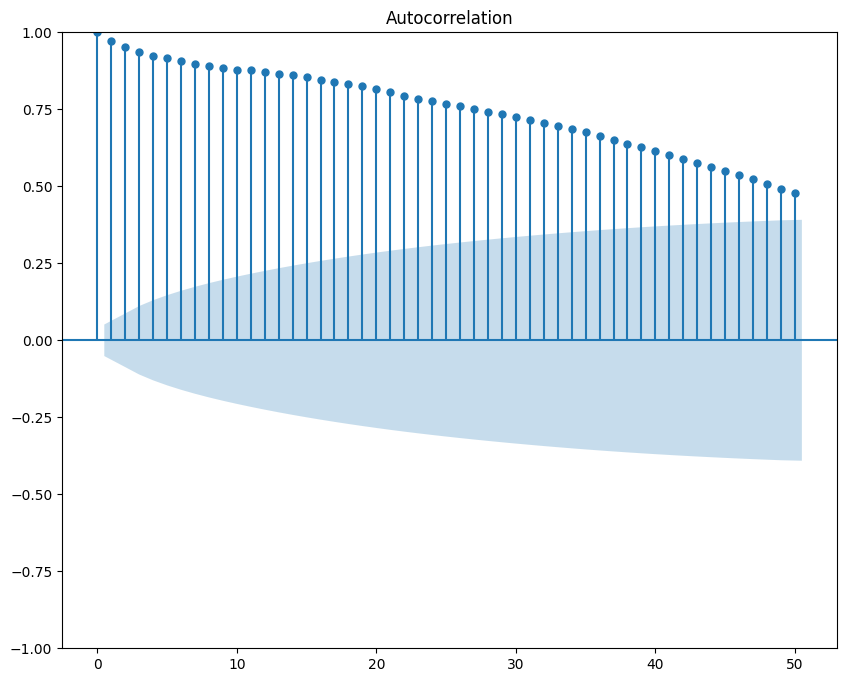

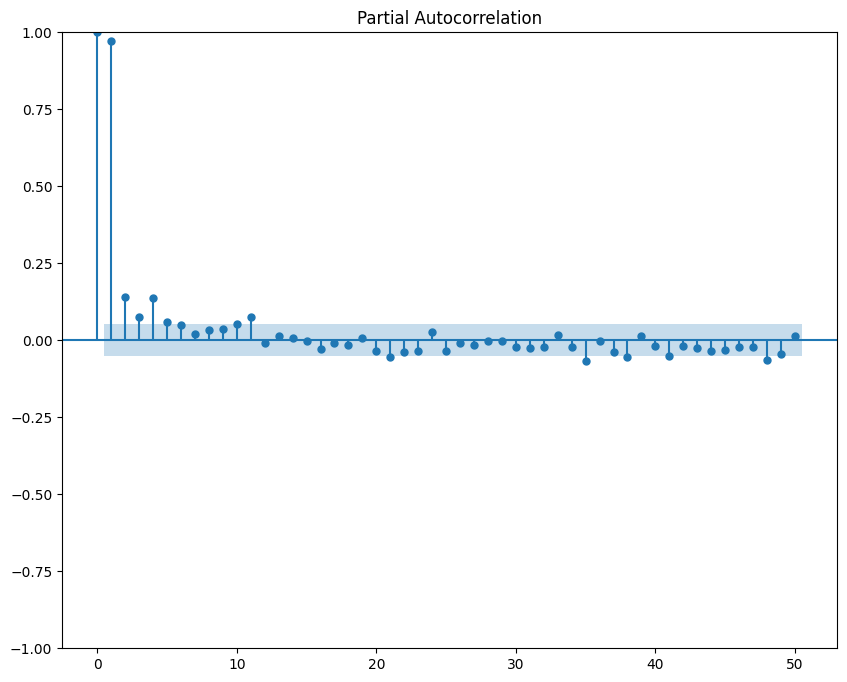

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_train['meantemp'], lags=50)  # Adjust lags as needed
plt.show()
plot_pacf(df_train['meantemp'], lags=50)  # Adjust lags as needed
plt.show()

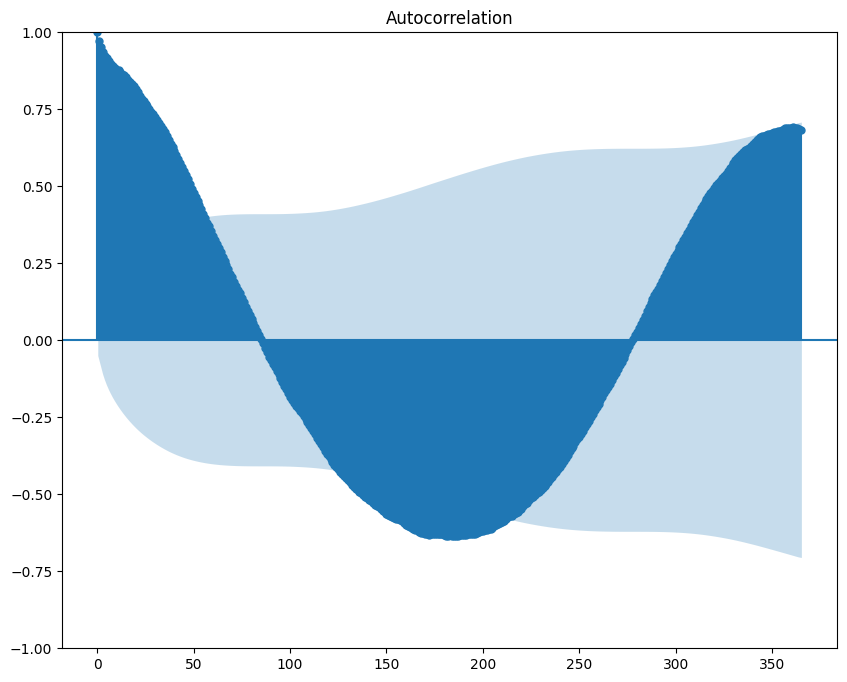

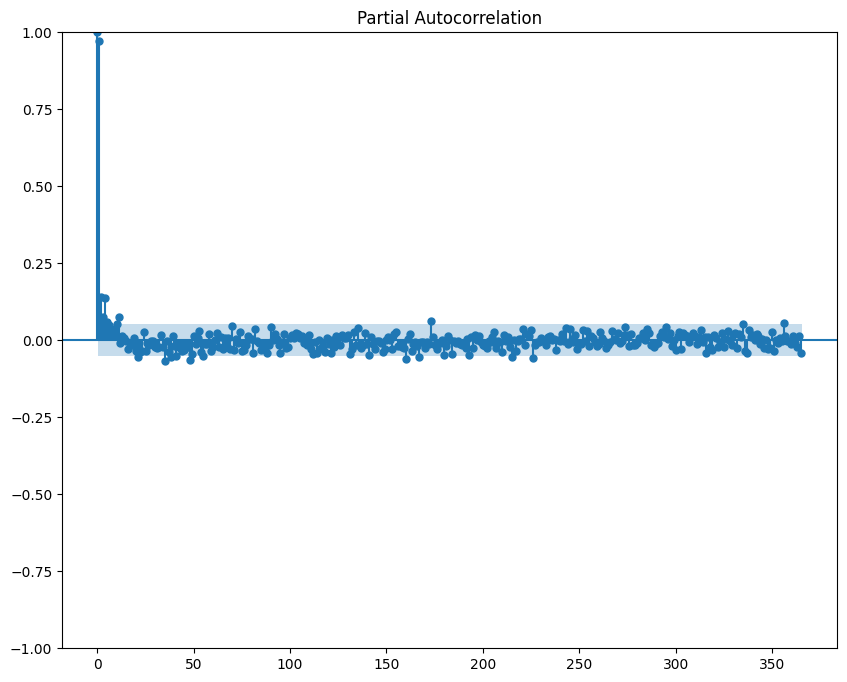

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_train['meantemp'], lags=365)  # Adjust lags as needed
plt.show()
plot_pacf(df_train['meantemp'], lags=365)  # Adjust lags as needed
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Select the variable and split the data (as in previous response)
data = df_train[['meantemp']].dropna()
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# 2. Fit the STL model
stl = STL(train_data['meantemp'], period=365)  # Assuming yearly seasonality
result = stl.fit()

In [ ]:
forecast = result.seasonal[-len(test_data):]

# 4. Evaluate forecasting performance
mae = mean_absolute_error(test_data['meantemp'], forecast)
rmse = np.sqrt(mean_squared_error(test_data['meantemp'], forecast))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 29.996317787611318
RMSE: 30.808565881119886


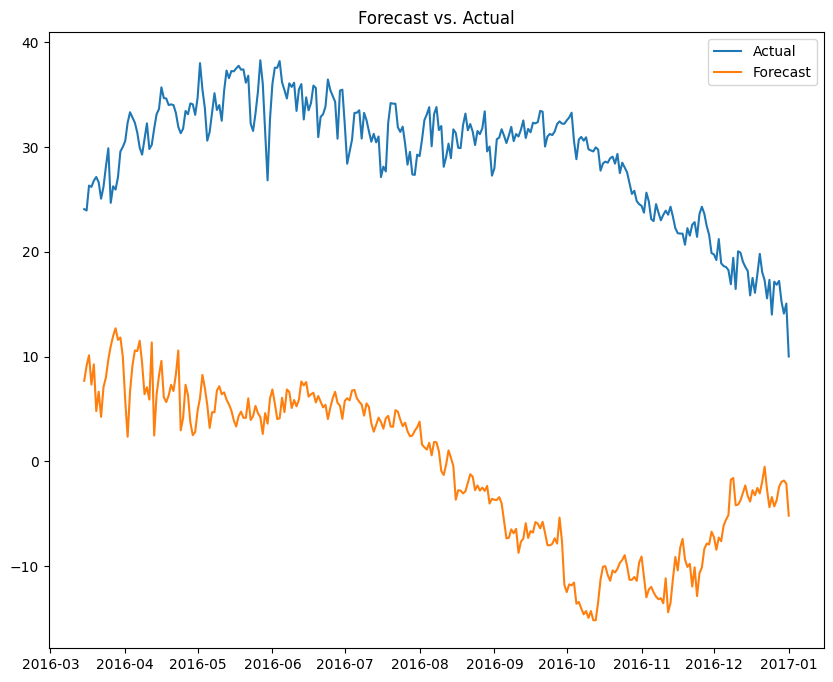

In [ ]:
plt.plot(test_data.index, test_data['meantemp'], label='Actual')  # Replace selected_variable with 'meantemp'
plt.plot(test_data.index, forecast, label='Forecast')
plt.legend()
plt.title('Forecast vs. Actual')
plt.show()